<a href="https://colab.research.google.com/github/SangamSilwal/DeepLearning_DSeries/blob/main/D17_transfer_Learning_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning
Tranfer learning is a research problem in machine learning that focusses on storing the knowledge gained while solving one problem and applying it to a different but related problem.

Its types are :
1. Feature Extraction
2. Fine Tuning

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 71% 155M/218M [00:00<00:00, 1.61GB/s]
100% 218M/218M [00:00<00:00, 1.04GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

**Feature Extraction** with Data Augmentation

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array,load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/training_set/training_set",
    target_size=(150,150),
    batch_size = batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    "/content/test_set/test_set",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
validation_generator.samples
train_generator.samples

8005

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8736 - loss: 0.2794

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 265ms/step - accuracy: 0.8736 - loss: 0.2794 - val_accuracy: 0.8968 - val_loss: 0.2460
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9375 - loss: 0.2020

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9375 - loss: 0.2020 - val_accuracy: 0.8909 - val_loss: 0.2513
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 250ms/step - accuracy: 0.8961 - loss: 0.2501 - val_accuracy: 0.8879 - val_loss: 0.2583
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8750 - loss: 0.2439 - val_accuracy: 0.8770 - val_loss: 0.3042
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step - accuracy: 0.9026 - loss: 0.2211 - val_accuracy: 0.8834 - val_loss: 0.2623
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8750 - loss: 0.2461 - val_accuracy: 0.8785 - val_loss: 0.2760
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 0.9107 - loss: 0.2078 - val_accuracy: 0.9038 - val_loss: 0.2266
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9375 - loss: 0.2071 - val_accuracy: 0.9053 - val_loss: 0.2310
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.9176 - loss: 0.2092 - val_accurac

[]

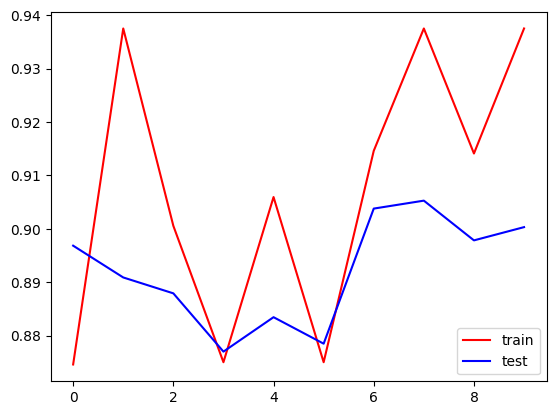

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.plot()

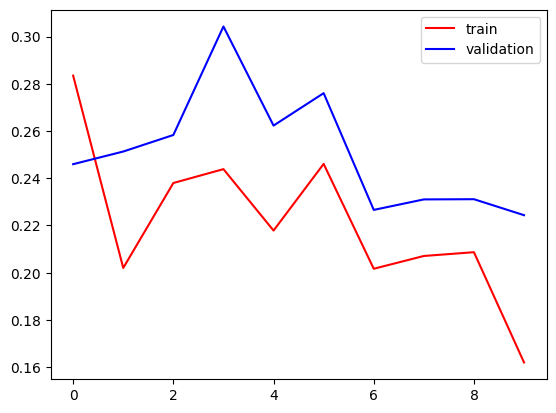

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Fine Tuning with Data Augmentation**

In [22]:
conv_base2 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [28]:
conv_base2.trainable = True

set_trainable = False

for layer in conv_base2.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base2.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [29]:
conv_base2.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [30]:
model = Sequential()

model.add(conv_base2)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/training_set/training_set",
    target_size=(150,150),
    batch_size = batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    "/content/test_set/test_set",
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 271ms/step - accuracy: 0.4989 - loss: 0.9267 - val_accuracy: 0.5010 - val_loss: 0.6931
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.4375 - loss: 0.6934

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4375 - loss: 0.6934 - val_accuracy: 0.5015 - val_loss: 0.6931
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.4852 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.4375 - loss: 0.6935 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 0.4885 - loss: 0.6932 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5625 - loss: 0.6926 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 265ms/step - accuracy: 0.5062 - loss: 0.6931 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5938 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 261ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accurac

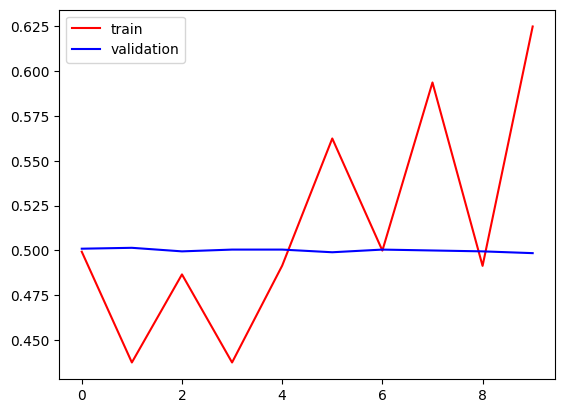

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()